<a href="https://colab.research.google.com/github/jeffheaton/app_generative_ai/blob/main/t81_559_class_08_1_kaggle_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T81-559: Applications of Generative Artificial Intelligence
**Module 9: MultiModal and Text to Image Models**
* Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), McKelvey School of Engineering, [Washington University in St. Louis](https://engineering.wustl.edu/Programs/Pages/default.aspx)
* For more information visit the [class website](https://sites.wustl.edu/jeffheaton/t81-558/).

# Module 9 Material

Module 9: MultiModal and Text to Image

* Part 9.1: Introduction to MultiModal and Text to Image [[Video]]() [[Notebook]](t81_559_class_09_1_image_genai.ipynb)
* **Part 9.2: Generating Images with DALL·E Kaggle Notebooks** [[Video]]() [[Notebook]](t81_559_class_09_2_dalle.ipynb)
* Part 8.3: DALL·E Existing Images [[Video]]() [[Notebook]](t81_559_class_09_3_dalle_existing.ipynb)
* Part 8.4: MultiModal Models [[Video]]() [[Notebook]](t81_559_class_09_4_multimodal.ipynb)
* Part 8.5: Illustrated Book [[Video]]() [[Notebook]](t81_559_class_09_5_illustrated_book.ipynb)

# Google CoLab Instructions
The following code ensures that Google CoLab is running and maps Google Drive if needed.

In [ ]:
import os

try:
    from google.colab import drive, userdata
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

# OpenAI Secrets
if COLAB:
    os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

# Install needed libraries in CoLab
if COLAB:
    !pip install langchain openai

Note: using Google CoLab


# Part 9.2: Generating Images with DALL·E Kaggle Notebooks

## DALE2 vs DALE3

The Images API provides three methods for interacting with images:

* Creating images from scratch based on a text prompt (DALL·E 3 and DALL·E 2)
* Creating edited versions of images by having the model replace some areas of a pre-existing image, based on a new text prompt (DALL·E 2 only)
* Creating variations of an existing image (DALL·E 2 only)


## Generating Multiple Images

Valid sizes include:

* 1024x512
* 256x256
* 512x512
* 1024x1024
* 1024x1792
* 1792x1024

Valid qualities include:

* standard
* hd





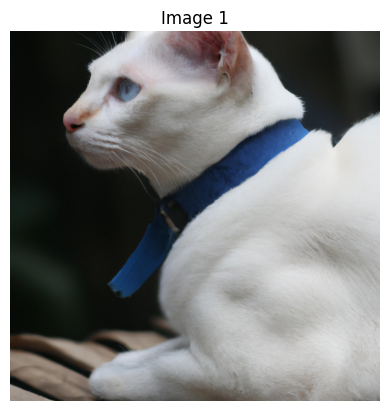

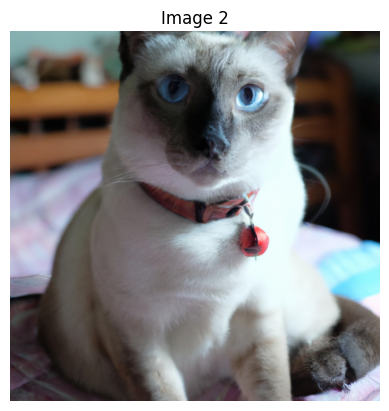

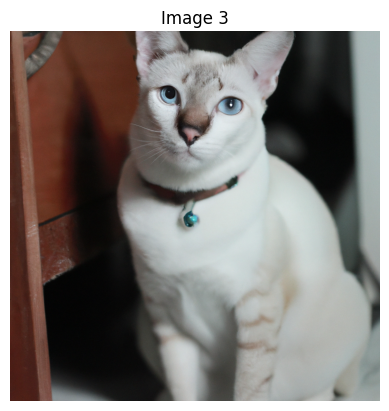

In [ ]:
from openai import OpenAI
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

client = OpenAI()

# Generate 3 images
response = client.images.generate(
    model="dall-e-2",
    prompt="a white siamese cat",
    size="1024x1024",
    quality="standard",
    n=3,  # Generate 3 images
)

# Loop through the generated images, display them with matplotlib, and save as JPG
for i, data in enumerate(response.data):
    # Get the image URL
    image_url = data.url

    # Fetch the image
    img_response = requests.get(image_url)
    img = Image.open(BytesIO(img_response.content))

    # Save the image as JPG to disk
    img.save(f"cat_image_{i+1}.jpg", "JPEG")

    # Display the image using matplotlib
    plt.imshow(img)
    plt.axis('off')  # Hide the axes for a cleaner view
    plt.title(f"Image {i+1}")  # Add a title to differentiate the images
    plt.show()


## DALI 3

With the release of DALL·E 3, the model now takes in the default prompt provided and automatically re-write it for safety reasons, and to add more detail (more detailed prompts generally result in higher quality images).

While it is not currently possible to disable this feature, you can use prompting to get outputs closer to your requested image by adding the following to your prompt:

```
I NEED to test how the tool works with extremely simple prompts. DO NOT add any detail, just use it AS-IS:.
```

The updated prompt is visible in the revised_prompt field of the data response object.

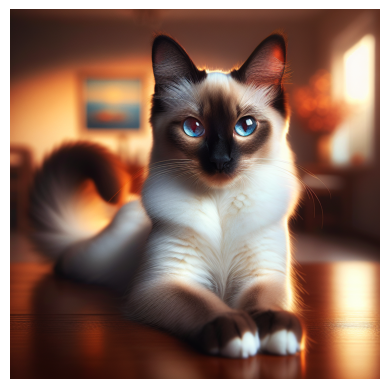

In [ ]:
from openai import OpenAI
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

client = OpenAI()

# Generate the image
response = client.images.generate(
  model="dall-e-3",
  prompt="a white siamese cat",
  size="1024x1024",
  quality="standard",
  n=1,
)

# Get the image URL
image_url = response.data[0].url

# Fetch the image from the URL
response2 = requests.get(image_url)
img = Image.open(BytesIO(response2.content))

# Save the image as a JPG to disk
img.save("cat_image.jpg", "JPEG")

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Hide the axes for a cleaner view
plt.show()


In [ ]:
print(response) # 1725928407

ImagesResponse(created=1725928407, data=[Image(b64_json=None, revised_prompt="Visualize a beautiful Siamese cat, with its signature coat colors predominantly white. The kitty's creamy white fur stands in striking contrast to the dark points on its ears, paws, and tail. It possesses strikingly crystal blue eyes that seem to hold an ocean within them, embodying the charm and elegance of the breed. The cat's body is toned and sleek, embodying athletic grace and beauty. The surrounding scene is warm, fostering a sense of tranquility and peace, complementing the serene disposition of the cat.", url='https://oaidalleapiprodscus.blob.core.windows.net/private/org-t0Qse7f5TeIpPdfmJatJLvjv/user-pW7JlvqdXEbSJxw76AHtkWvN/img-qg1lGyk3RRtys8RHZFivfuWk.png?st=2024-09-09T23%3A33%3A27Z&se=2024-09-10T01%3A33%3A27Z&sp=r&sv=2024-08-04&sr=b&rscd=inline&rsct=image/png&skoid=d505667d-d6c1-4a0a-bac7-5c84a87759f8&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2024-09-09T23%3A29%3A30Z&ske=2024-09-10T23%3A29%3A3


```
BadRequestError: Error code: 400 - {'error': {'code': 'content_policy_violation', 'message': 'Your request was rejected as a result of our safety system. Your prompt may contain text that is not allowed by our safety system.', 'param': None, 'type': 'invalid_request_error'}}
```

In [ ]:
from google.colab import files

# Download the image saved as variation_image_1.png
files.download('variation_image_1.png')
